In [1]:
#pip install bs4 Anaconda command line
#!pip install requests 

from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd # required to store the requested table in a dataframe
import matplotlib.pyplot as plt # data visualization
import seaborn as sns

In [2]:
# this link contains information about cities and towns in Turkey

url = "https://en.wikipedia.org/wiki/Provinces_of_Turkey"

In [3]:
#store the information of webpage in text format and assign it to the variable named city_data

city_data  = requests.get(url).text

In [4]:
soup = BeautifulSoup(city_data,"html5lib")

In [5]:
#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

# examine how many tables were found
len(tables)

17

In [6]:
##display tables 
tables

[<table class="box-Multiple_issues plainlinks metadata ambox ambox-content ambox-multiple_issues compact-ambox" role="presentation"><tbody><tr><td class="mbox-image"><div style="width:52px"><img alt="" data-file-height="40" data-file-width="40" decoding="async" height="40" src="//upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ambox_important.svg/40px-Ambox_important.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ambox_important.svg/60px-Ambox_important.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ambox_important.svg/80px-Ambox_important.svg.png 2x" width="40"/></div></td><td class="mbox-text"><div class="mbox-text-span"><div class="mw-collapsible" style="width:95%; margin: 0.2em 0;"><b>This article has multiple issues.</b> Please help <b><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Provinces_of_Turkey&amp;action=edit">improve it</a></b> or discuss these issues on the <b><a href="/wiki/Talk:Provinces_of_Turkey" title="Talk:Prov

In [7]:
for index,table in enumerate(tables):
    if ("Provinces of the Republic of Turkey" in str(table)):
        table_index = index
print(table_index)

5


In [8]:
print(tables[table_index].prettify())

<table class="sortable wikitable" style="float:left; margin:0 0 0 1em; background:#fff; border:1px #aaa solid; border-collapse:collapse; text-align:left; font-size:100%;">
 <caption>
  <b>
   Provinces of the Republic of Turkey
  </b>
 </caption>
 <tbody>
  <tr style="text-align:center; background: #efefef; border-bottom:2px solid gray;">
   <th>
   </th>
   <th>
    Name
   </th>
   <th>
    Area (km
    <sup>
     2
    </sup>
    )
   </th>
   <th>
    Population (2000 census)
   </th>
   <th>
    Population (2019-2020 estimate)
    <sup class="reference" id="cite_ref-1">
     <a href="#cite_note-1">
      [1]
     </a>
    </sup>
   </th>
  </tr>
  <tr>
   <td>
    01
   </td>
   <td>
    <a href="/wiki/Adana_Province" title="Adana Province">
     Adana
    </a>
   </td>
   <td style="text-align:right;">
    14,045.56
   </td>
   <td style="text-align:right;">
    1,854,270
   </td>
   <td style="text-align:right;">
    2,237,940
   </td>
  </tr>
  <tr>
   <td>
    02
   </td>
   <

In [9]:
population_data = pd.DataFrame(columns=["Rank", "Province", "Area(km^2)", "Population(2000 census)", "Population(2020)"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        rank = col[0].text
        province = col[1].text
        area = col[2].text.strip()
        population_2000 = col[3].text.strip()
        population_2020 = col[4].text.strip()
        population_data = population_data.append({"Rank":rank, "Province":province, "Area(km^2)":area, "Population(2000 census)":population_2000, "Population(2020)":population_2020}, ignore_index=True)

population_data

,Rank,Province,Area(km^2),Population(2000 census),Population(2020)
0,01\n,Adana\n,"14,045.56","1,854,270","2,237,940"
1,02\n,Adıyaman\n,"7,606.16","623,811","626,465"
2,03\n,Afyonkarahisar\n,"14,718.63","812,416","729,483"
3,04\n,Ağrı\n,"11,498.67","528,744","536,199"
4,05\n,Amasya\n,"5,703.78","365,231","337,800"
...,...,...,...,...,...
76,77\n,Yalova\n,850.46,"168,593","270,976"
77,78\n,Karabük\n,"4,108.80","225,102","248,958"
78,79\n,Kilis\n,"1,427.76","114,724","142,490"
79,80\n,Osmaniye\n,"3,195.99","458,782","538,759"


In [10]:
## /n from the Rank column and Province column
for i in range(0,len(population_data)):
        population_data["Province"][i] = population_data["Province"][i][:-1]
        population_data["Rank"][i] = population_data["Rank"][i][:-1]


In [11]:
#glimpse at population data
population_data.head()

,Rank,Province,Area(km^2),Population(2000 census),Population(2020)
0,01,Adana,"14,045.56","1,854,270","2,237,940"
1,02,Adıyaman,"7,606.16","623,811","626,465"
2,03,Afyonkarahisar,"14,718.63","812,416","729,483"
3,04,Ağrı,"11,498.67","528,744","536,199"
4,05,Amasya,"5,703.78","365,231","337,800"


In [12]:
#check whether there is any undescribed values or not 
population_data.isnull().sum()

Rank                       0
Province                   0
Area(km^2)                 0
Population(2000 census)    0
Population(2020)           0
dtype: int64

In [13]:
#observe the type of numeric columns
type(population_data["Population(2020)"])

pandas.core.series.Series

In [14]:
for i in range(0,len(population_data)):
    population_data["Population(2020)"][i] = population_data["Population(2020)"][i].replace(",","")
    population_data["Population(2000 census)"][i] = population_data["Population(2000 census)"][i].replace(",","")
    population_data["Area(km^2)"][i] = population_data["Area(km^2)"][i].replace(",","")
population_data

,Rank,Province,Area(km^2),Population(2000 census),Population(2020)
0,01,Adana,14045.56,1854270,2237940
1,02,Adıyaman,7606.16,623811,626465
2,03,Afyonkarahisar,14718.63,812416,729483
3,04,Ağrı,11498.67,528744,536199
4,05,Amasya,5703.78,365231,337800
...,...,...,...,...,...
76,77,Yalova,850.46,168593,270976
77,78,Karabük,4108.80,225102,248958
78,79,Kilis,1427.76,114724,142490
79,80,Osmaniye,3195.99,458782,538759


In [15]:
## change the type of numeric colums to integer
population_data[["Population(2020)"]] = population_data[["Population(2020)"]].astype(int)
population_data[["Population(2000 census)"]] = population_data[["Population(2000 census)"]].astype(int)



In [16]:
## sort according to population 2020
sorted_pop = population_data.sort_values("Population(2020)", ascending = False)

<AxesSubplot:xlabel='Province', ylabel='Population(2020)'>

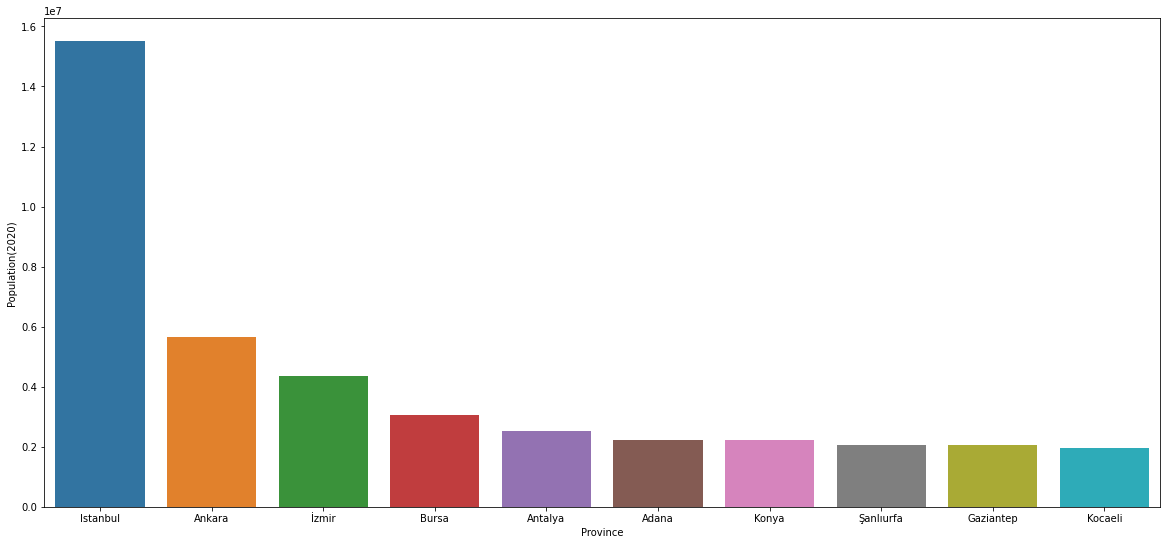

In [17]:
# visualize the top ten cities according to population 2020
plt.figure(figsize=(20,9))
sns.barplot(x = sorted_pop["Province"].head(10), y = sorted_pop["Population(2020)"].head(10))

In [18]:
## sort according to population 2000
sorted_pop_2000 = population_data.sort_values("Population(2000 census)", ascending = False)

<AxesSubplot:xlabel='Province', ylabel='Population(2000 census)'>

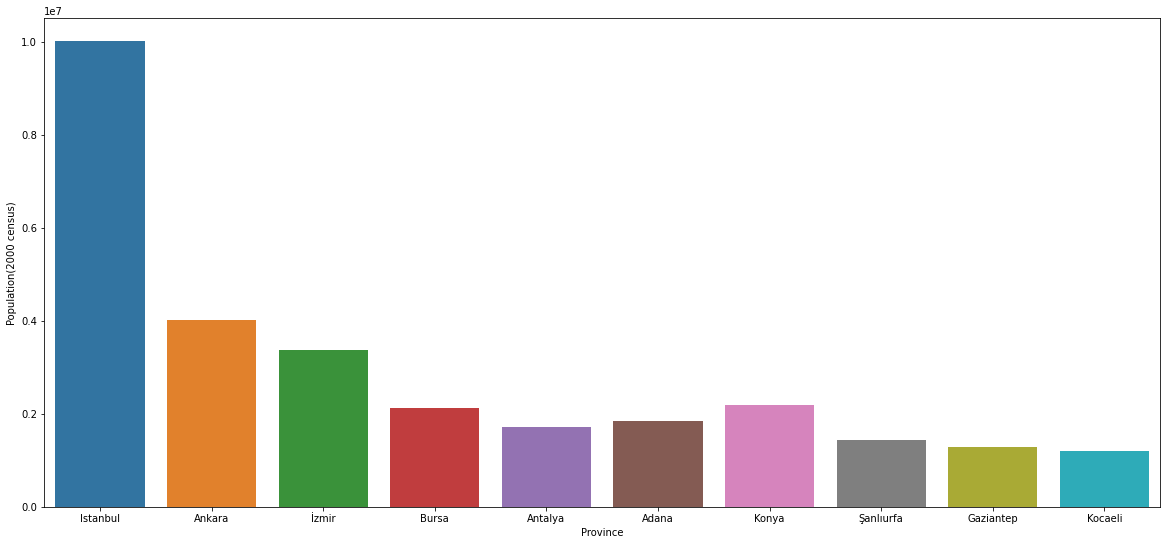

In [19]:
# visualize the top ten cities according to population 2000
plt.figure(figsize=(20,9))
sns.barplot(x = sorted_pop["Province"].head(10), y = sorted_pop["Population(2000 census)"].head(10))